alpha = 18.91476479372229
beta = 19.931049766788345
phi2 = -0.949009962598181


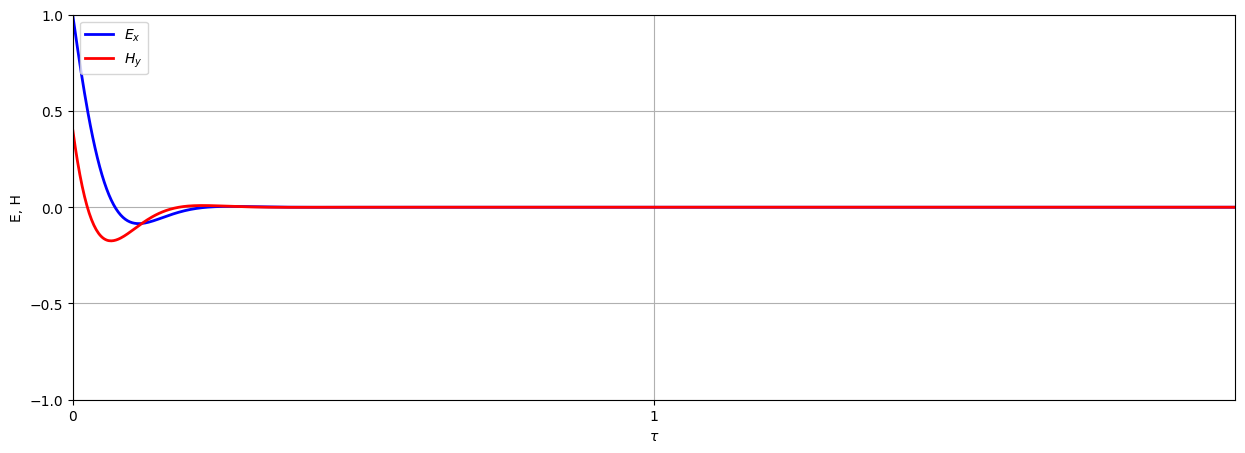

In [6]:
## Step 1: Background frame

%matplotlib inline

from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import numpy as np
import matplotlib.pyplot as plt

# CASOS:
# c?
# c
# omega
# SIGMA? tgdelta?
# SIGMA = 0, 0.1 -> vf
# SIGMA = 1, 10 -> delta_s


XMAX = 2
YMAX = 1
XDIV = 1 # np.pi
YDIV = 0.5
FRAMERATE = 50
T_ANIM = 1

C = 1.0
F = 1 # Multiplo de 1/T_ANIM
OMEGA = 2*np.pi*F
SIGMA = 100
ETA = 1.2

beta = OMEGA/(np.sqrt(2)*C)*np.sqrt(1 + np.sqrt(1+SIGMA**2*C**2*ETA**2/OMEGA**2))
alpha = OMEGA/(np.sqrt(2)*C)*np.sqrt(np.sqrt(1+SIGMA**2*C**2*ETA**2/OMEGA**2) - 1)
phi2 = -alpha/beta

print('alpha = ' + str(alpha))
print('beta = ' + str(beta))
print('phi2 = ' + str(phi2))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15,5))
plt.grid(visible=True)
                       
# Set up the subplots
ax.set_xlim((0, XMAX))
ax.set_ylim((-YMAX, YMAX))
ax.set_xlabel(r'$\tau$')
ax.set_ylabel('E, H')
ax.set_xticks(np.arange(0, XMAX, XDIV))
ax.set_yticks(np.arange(-YMAX, YMAX + YDIV, YDIV))

# Create objects that will change in the animiation.
# These objects are initially empty, and will be given new values for each frame in the animation.
line1, = ax.plot([], [], 'b', lw=2)  # ax.plot returns a list of 2D line objects.
line2, = ax.plot([], [], 'r', lw=2)

ax.legend([r'$E_x$', r'$H_y$'], loc='upper left');


## Step 2: Define a function to draw each frame

# Animation function. This function is called sequentially.
def drawframe(n):
    x = np.linspace(0, XMAX, 1000)
    y1 = np.exp(-alpha*x)*np.cos(OMEGA*n/FRAMERATE - beta*x)
    y2 = np.exp(-alpha*x)*(1/ETA)*np.cos(OMEGA*n/FRAMERATE - beta*x/C+phi2)
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    return (line1,line2)


## Step 3: Create the animation object

from matplotlib import animation

anim = animation.FuncAnimation(fig, drawframe, frames=T_ANIM*FRAMERATE, interval=1000.0/FRAMERATE, blit=True)
# blit = True re-draws only the parts that have changed.


## Step 4 (JavaScript version)
# Use HTML(anim.to_jshtml())
# See [Stackoverflow inline animations in Jupyter](https://stackoverflow.com/questions/43445103/inline-animations-in-# jupyter#43447370). Note that this takes some time to parse.

from IPython.display import HTML
HTML(anim.to_jshtml())

